Building a Random Forest Classifier from scratch and fitting it on Dataset2

Building a Random Forest Classifier on Dataset 1 using Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from  sklearn.metrics import accuracy_score,f1_score

In [ ]:
df = pd.read_csv("content/Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(X.shape)
print(y.shape)

(150, 5)
(150,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rndfor = RandomForestClassifier(n_estimators=100)

rndfor.fit(X_train, y_train)
y_pred_1 = rndfor.predict(X_train)
y_pred_2 = rndfor.predict(X_test)

print("Accuracy Score (Training): ", accuracy_score(y_train, y_pred_1))
print("F1 Score (Training)", f1_score(y_train, y_pred_1, average="weighted"))

print("Accuracy Score (Testing): ", accuracy_score(y_test, y_pred_2))
print("F1 Score (Testing)", f1_score(y_test, y_pred_2, average="weighted"))

Accuracy Score (Training):  1.0
F1 Score (Training) 1.0
Accuracy Score (Testing):  1.0
F1 Score (Testing) 1.0


In [ ]:
clf = DecisionTreeClassifier()

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_train)
y_pred_2 = clf.predict(X_test)

print("Accuracy Score (Training): ", accuracy_score(y_train, y_pred_1))
print("F1 Score (Training)", f1_score(y_train, y_pred_1, average="weighted"))

print("Accuracy Score (Testing): ", accuracy_score(y_test, y_pred_2))
print("F1 Score (Testing)", f1_score(y_test, y_pred_2, average="weighted"))

Accuracy Score (Training):  1.0
F1 Score (Training) 1.0
Accuracy Score (Testing):  1.0
F1 Score (Testing) 1.0


Bulding Random forest on Dataset 1,2 and 3 and comparing results with and without selecting important features only

Dataset 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from  sklearn.metrics import accuracy_score,f1_score

In [ ]:
dataset_1 = pd.read_csv("content/Iris.csv")
dataset_1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
feature_col = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_col]
y = df['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
import pandas as pd

df['column_binned'] = pd.cut(df['SepalLengthCm'], bins=5)

df['column_binned'].value_counts()

column_binned
(5.74, 6.46]     42
(5.02, 5.74]     41
(4.296, 5.02]    32
(6.46, 7.18]     24
(7.18, 7.9]      11
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9666666666666667


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9666666666666667


In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index=feature_col).sort_values(ascending=False)
print(feature_imp)

PetalWidthCm     0.448718
PetalLengthCm    0.389443
SepalLengthCm    0.135047
SepalWidthCm     0.026792
dtype: float64


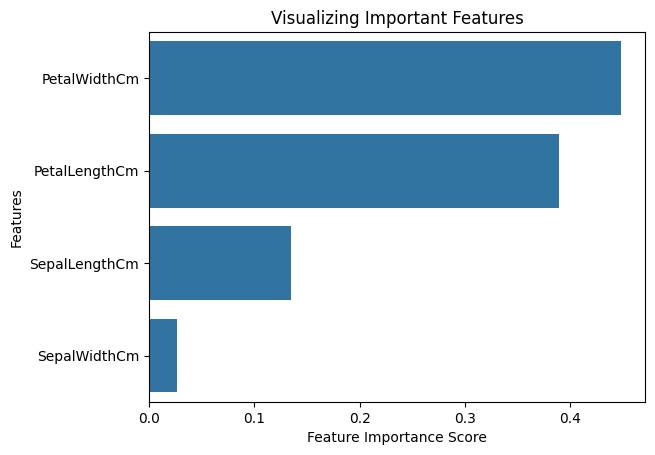

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9666666666666667


We see that even dropping the column with the lowest importance does not make that big of a difference

Dataset 2

In [ ]:
dataset2 = pd.read_csv("content/Breast_cancer_data.csv")
dataset2.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
from sklearn.model_selection import train_test_split

X = dataset2[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']]
y = dataset2['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf2 = RandomForestClassifier(n_estimators=100)

clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8947368421052632


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf2 = DecisionTreeClassifier()

clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
feature_col2 = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']
feature_imp2 = pd.Series(clf2.feature_importances_, index=feature_col2).sort_values(ascending=False)
print(feature_imp2)

mean_area          0.298678
mean_perimeter     0.267576
mean_radius        0.219950
mean_texture       0.124449
mean_smoothness    0.089348
dtype: float64


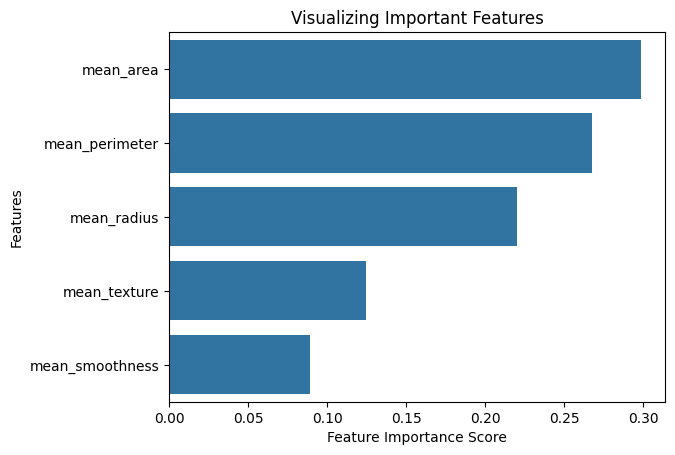

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp2, y=feature_imp2.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = dataset2[['mean_perimeter', 'mean_area', 'mean_radius', 'mean_texture']]
y = dataset2['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.868421052631579


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf2 = DecisionTreeClassifier()

clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


We see that even dropping the column with the lowest importance does not make that big of a difference

Dataset 3

In [ ]:
dataset3 = pd.read_csv("content/2013.csv")
dataset3.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_AGE80,_IMPEDUC,_IMPMRTL,_IMPHOME,RCSBRAC1,RCSRACE1,RCHISLA1,RCSBIRTH,TYPEINDS,TYPEWORK
0,1.0,1.0,b'01092013',b'01',b'09',b'2013',1100.0,2.013001e+09,2.013001e+09,1.0,...,60.0,6.0,2.0,1.0,NaN,b'',b'',b'',b'',b''
1,1.0,1.0,b'01192013',b'01',b'19',b'2013',1100.0,2.013001e+09,2.013001e+09,1.0,...,50.0,5.0,1.0,1.0,NaN,b'',b'',b'',b'',b''
2,1.0,1.0,b'01192013',b'01',b'19',b'2013',1100.0,2.013001e+09,2.013001e+09,1.0,...,55.0,6.0,1.0,1.0,NaN,b'',b'',b'',b'',b''
3,1.0,1.0,b'01112013',b'01',b'11',b'2013',1100.0,2.013001e+09,2.013001e+09,1.0,...,64.0,4.0,1.0,1.0,NaN,b'',b'',b'',b'',b''
4,1.0,2.0,b'02062013',b'02',b'06',b'2013',1100.0,2.013001e+09,2.013001e+09,1.0,...,66.0,6.0,1.0,1.0,NaN,b'',b'',b'',b'',b''


In [ ]:
dataset3.drop('IDATE',axis=1,inplace=True)
dataset3.drop('IMONTH',axis=1,inplace=True)
dataset3.drop('IDAY',axis=1,inplace=True)
dataset3.drop('IYEAR',axis=1,inplace=True)

In [ ]:
dataset3.head()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_AGE80,_IMPEDUC,_IMPMRTL,_IMPHOME,RCSBRAC1,RCSRACE1,RCHISLA1,RCSBIRTH,TYPEINDS,TYPEWORK
0,1.0,1.0,1100.0,2.013001e+09,2.013001e+09,1.0,1.0,NaN,1.0,1.0,...,60.0,6.0,2.0,1.0,NaN,0,0,0,0,0
1,1.0,1.0,1100.0,2.013001e+09,2.013001e+09,1.0,1.0,NaN,1.0,1.0,...,50.0,5.0,1.0,1.0,NaN,0,0,0,0,0
2,1.0,1.0,1100.0,2.013001e+09,2.013001e+09,1.0,1.0,NaN,1.0,1.0,...,55.0,6.0,1.0,1.0,NaN,0,0,0,0,0
3,1.0,1.0,1100.0,2.013001e+09,2.013001e+09,1.0,1.0,NaN,1.0,1.0,...,64.0,4.0,1.0,1.0,NaN,0,0,0,0,0
4,1.0,2.0,1100.0,2.013001e+09,2.013001e+09,1.0,1.0,NaN,1.0,1.0,...,66.0,6.0,1.0,1.0,NaN,0,0,0,0,0


In [ ]:
X = dataset3.iloc[:, :-1]
y = dataset3.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in dataset3.columns:
    if dataset3[col].dtype == "object":
        dataset3[col] = le.fit_transform(dataset3[col])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf3 = RandomForestClassifier(n_estimators=100)

clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
feature_col = dataset3.columns.values
feature_col

array(['_STATE', 'FMONTH', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENUM',
       'PVTRESD1', 'COLGHOUS', 'STATERES', 'CELLFON3', 'LADULT',
       'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'GENHLTH', 'PHYSHLTH',
       'MENTHLTH', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST',
       'CHECKUP1', 'SLEPTIM1', 'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'CHOLCHK',
       'TOLDHI2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3',
       'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3',
       'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'VETERAN3', 'MARITAL',
       'CHILDREN', 'EDUCA', 'EMPLOY1', 'INCOME2', 'WEIGHT2', 'HEIGHT3',
       'NUMHHOL2', 'NUMPHON2', 'CPDEMO1', 'CPDEMO4', 'INTERNET',
       'RENTHOM1', 'SEX', 'PREGNANT', 'QLACTLM2', 'USEEQUIP', 'BLIND',
       'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100',
       'SMOKDAY2', 'STOPSMK2', 'LASTSMK2', 'USENOW3', 'ALCDAY5',
       'AVEDRNK2', 'DRNK3GE5', 'MAXDRNKS', 'FRUITJU1', 'FRUIT1',
       'FVBEANS', 'FVGREEN', 'FVORANG', 'VEGETAB1', 'EXERANY2'

In [ ]:
feature_col = feature_col[:-1]
feature_col

array(['_STATE', 'FMONTH', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENUM',
       'PVTRESD1', 'COLGHOUS', 'STATERES', 'CELLFON3', 'LADULT',
       'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'GENHLTH', 'PHYSHLTH',
       'MENTHLTH', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST',
       'CHECKUP1', 'SLEPTIM1', 'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'CHOLCHK',
       'TOLDHI2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3',
       'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3',
       'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'VETERAN3', 'MARITAL',
       'CHILDREN', 'EDUCA', 'EMPLOY1', 'INCOME2', 'WEIGHT2', 'HEIGHT3',
       'NUMHHOL2', 'NUMPHON2', 'CPDEMO1', 'CPDEMO4', 'INTERNET',
       'RENTHOM1', 'SEX', 'PREGNANT', 'QLACTLM2', 'USEEQUIP', 'BLIND',
       'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100',
       'SMOKDAY2', 'STOPSMK2', 'LASTSMK2', 'USENOW3', 'ALCDAY5',
       'AVEDRNK2', 'DRNK3GE5', 'MAXDRNKS', 'FRUITJU1', 'FRUIT1',
       'FVBEANS', 'FVGREEN', 'FVORANG', 'VEGETAB1', 'EXERANY2'

In [ ]:
feature_imp3= pd.Series(clf2.feature_importances_, index=feature_col).sort_values(ascending=False)
print(feature_imp3)

_STATE      0.0
_LLCPWT2    0.0
_DUALUSE    0.0
_CLLCPWT    0.0
_IMPCSEX    0.0
           ... 
DIABEDU     0.0
DIABEYE     0.0
EYEEXAM     0.0
FEETCHK     0.0
TYPEINDS    0.0
Length: 331, dtype: float64


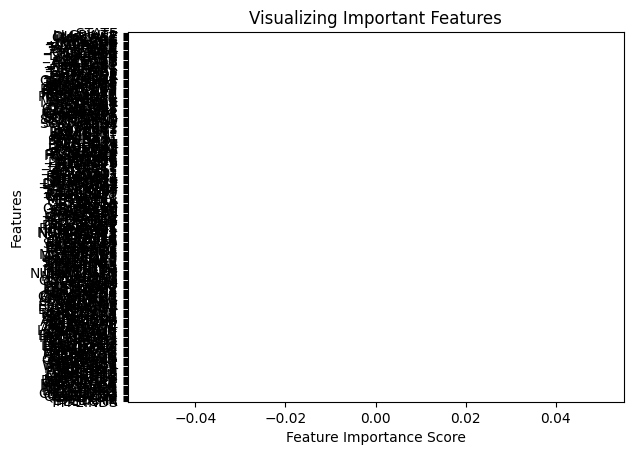

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp3, y=feature_imp3.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
